In [46]:
import pandas as pd
import numpy as np

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
train = pd.read_csv('titanic_train.csv')

In [49]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

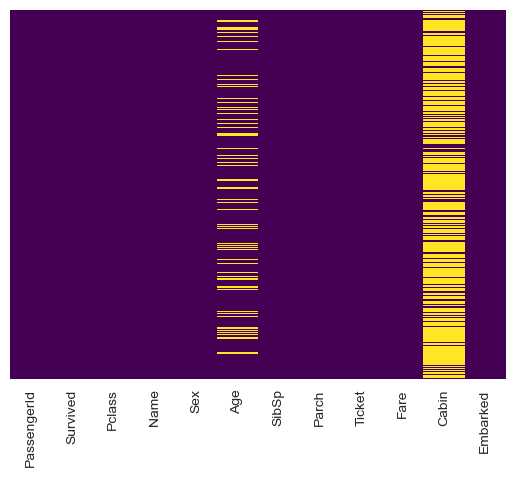

In [51]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [52]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

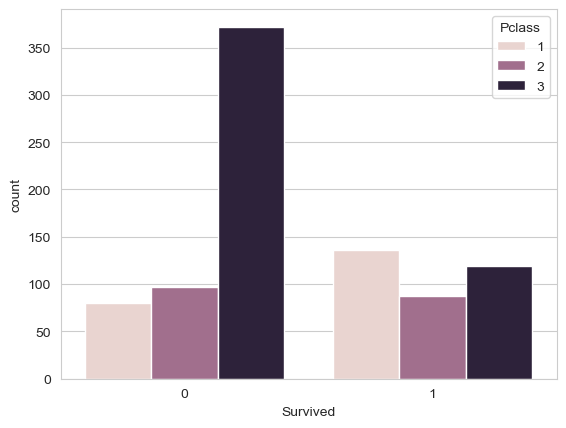

In [53]:
sns.countplot(x='Survived',hue='Pclass', data=train)

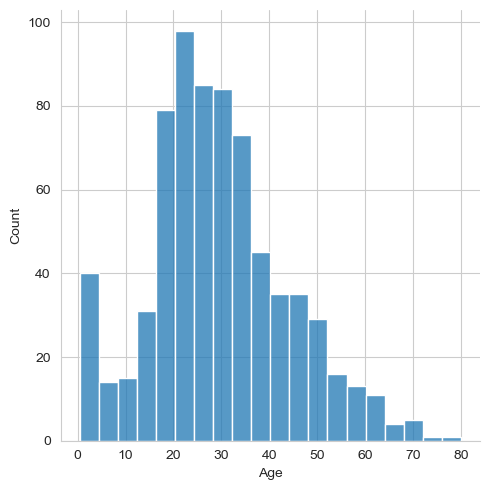

In [54]:
sns.displot(train['Age'].dropna(), kde=False)

<Axes: xlabel='SibSp', ylabel='count'>

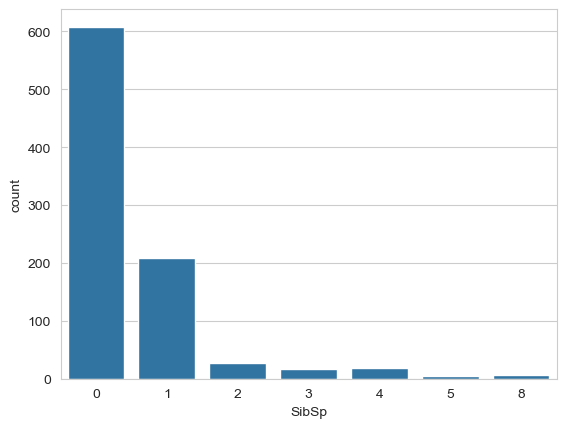

In [55]:
sns.countplot(x='SibSp', data=train)

<Axes: >

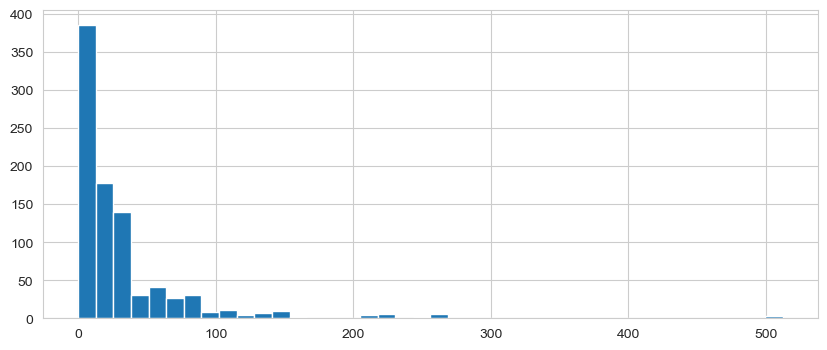

In [56]:
train['Fare'].hist(bins=40, figsize=(10,4))

In [57]:
import cufflinks as cf

In [58]:
cf.go_offline()

In [59]:
train['Fare'].iplot(kind='hist')

<Axes: xlabel='Pclass', ylabel='Age'>

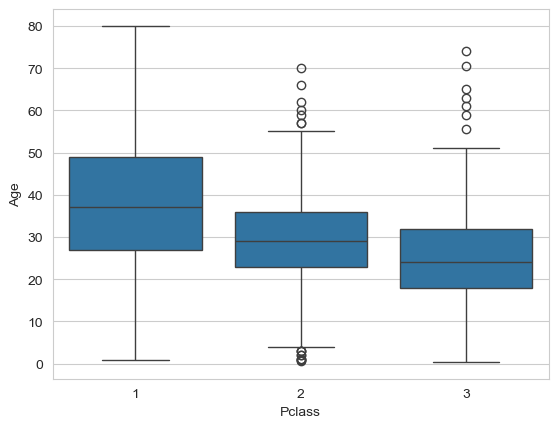

In [60]:
sns.boxplot(x='Pclass', y='Age', data=train)

In [61]:
def impute_age(cols):
    Age = cols['Age']
    Pclass = cols['Pclass']
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [62]:
#train['Age']
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<Axes: >

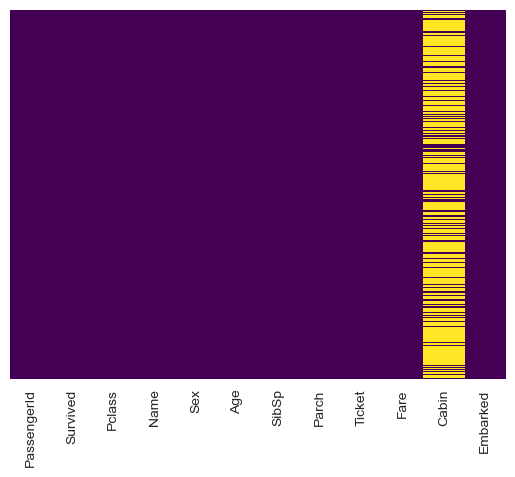

In [63]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [64]:
train.drop('Cabin', axis=1, inplace=True)

In [65]:
train.dropna(inplace=True)

<Axes: >

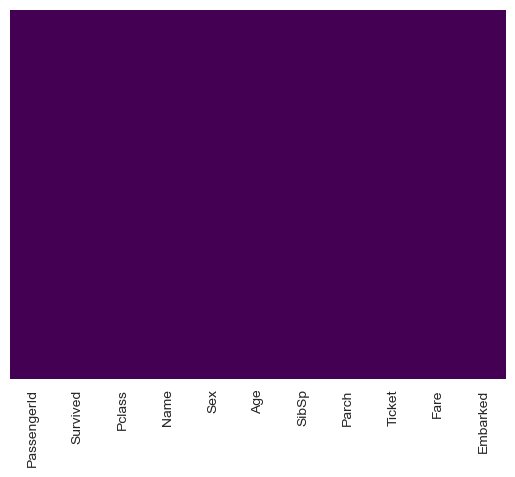

In [66]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [67]:
sex = pd.get_dummies(train['Sex'], drop_first=True).astype(int)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [68]:
embark = pd.get_dummies(train['Embarked'], drop_first=True).astype(int)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [69]:
train = pd.concat([train, sex, embark], axis=1)

In [70]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0


In [71]:
train.drop(['PassengerId', 'Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace= True)

In [72]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0
